1. EDA

In [1]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV #the ones that could be written with simpler API
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score #auc means area under curve #asymmetric targetset makes auc score more valid

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os 
import zipfile
os.system('kaggle competitions download -c santander-customer-satisfaction -p C:\\Users\\Dongjun\\.kaggle') 
zipfile.ZipFile('C:\\Users\\Dongjun\\.kaggle\\santander-customer-satisfaction.zip').extractall('C:\\Users\\Dongjun\\.kaggle\\santander') 
train_df=pd.read_csv('C:\\Users\\Dongjun\\.kaggle\\santander\\train.csv')
test_df=pd.read_csv('C:\\Users\\Dongjun\\.kaggle\\santander\\test.csv')

In [4]:
df=pd.concat([train_df,test_df],axis=0,ignore_index=True) #if not, df[5] will have double values 

1-1. Basic statistics

In [5]:
df.info() #all in numerical forms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151838 entries, 0 to 151837
Columns: 371 entries, ID to TARGET
dtypes: float64(116), int64(255)
memory usage: 429.8 MB


In [6]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,151838.000000,151838.000000,151838.000000,151838.000000,151838.000000,151838.000000,151838.000000,151838.000000,151838.000000,151838.000000,...,151838.000000,151838.000000,151838.000000,151838.000000,151838.000000,151838.000000,151838.000000,151838.000000,1.518380e+05,76020.000000
mean,75919.500000,-1551.539391,33.175898,84.688322,73.336683,121.330641,4.068145,7.068982,0.441757,0.619828,...,10.184196,1.346302,14.839290,10.726624,47.530234,6.625190,85.986327,63.550096,1.173110e+05,0.039569
std,43831.999424,39394.010507,12.944275,1655.242347,351.967351,577.094428,115.015926,201.304542,32.359675,39.528498,...,750.300862,144.945384,1044.316933,738.430127,3011.415348,757.611606,4360.172261,3094.024954,2.177175e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.600000,-0.600000,0.000000,0.000000,0.000000,0.000000,1.202730e+03,0.000000
25%,37960.250000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.770562e+04,0.000000
50%,75919.500000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.061020e+05,0.000000
75%,113878.750000,2.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.185435e+05,0.000000
max,151838.000000,238.000000,105.000000,240000.000000,21093.960000,47943.960000,21093.960000,47943.960000,6600.000000,6600.000000,...,146605.320000,40080.600000,162355.800000,138054.960000,453893.400000,217762.230000,681462.900000,397884.300000,2.889440e+07,1.000000


2. Preprocessing

2-3. Discretization 

In [7]:
id_df=pd.DataFrame(df,columns=['ID']) 
target_df=pd.DataFrame(df,columns=['TARGET']) 
target_df.dropna(inplace=True)
df.drop(['ID','TARGET'],axis=1,inplace=True)

In [8]:
df.nunique().sort_values()

num_reemb_var33_hace3             1
saldo_var46                       1
saldo_var41                       1
ind_var41                         1
num_trasp_var33_out_hace3         1
                              ...  
saldo_medio_var5_ult1         25650
saldo_var42                   28458
saldo_medio_var5_ult3         29322
saldo_var30                   30654
var38                        109982
Length: 369, dtype: int64

In [9]:
for var in df.columns:
  if df[var].nunique()==1:
    df.drop(var,axis=1,inplace=True)

In [10]:
from sklearn.preprocessing import KBinsDiscretizer
for var in df.columns:
   discretizer=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='uniform') #prefer width if bin_width gets so small due to dispropotionate distribution
   disc=discretizer.fit_transform(df[var].values.reshape(-1,1))
   df[var]=pd.Series(disc.reshape(-1))

<AxesSubplot:xlabel='var38', ylabel='Count'>

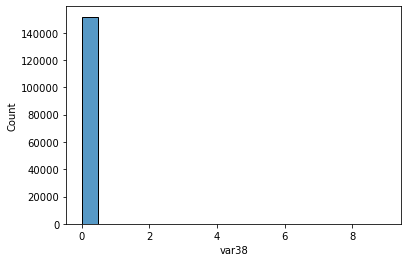

In [11]:
sns.histplot(data=df['var38'])

In [12]:
for var in df.columns:
  if df[var].value_counts(ascending=False)[0]>140000: #too many Rare labels 
    df.drop(var,axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151838 entries, 0 to 151837
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   var3                      151838 non-null  float64
 1   var15                     151838 non-null  float64
 2   ind_var5_0                151838 non-null  float64
 3   ind_var5                  151838 non-null  float64
 4   ind_var30_0               151838 non-null  float64
 5   ind_var30                 151838 non-null  float64
 6   ind_var39_0               151838 non-null  float64
 7   ind_var41_0               151838 non-null  float64
 8   num_var4                  151838 non-null  float64
 9   num_var5_0                151838 non-null  float64
 10  num_var5                  151838 non-null  float64
 11  num_var35                 151838 non-null  float64
 12  num_var42                 151838 non-null  float64
 13  var36                     151838 non-null  f

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

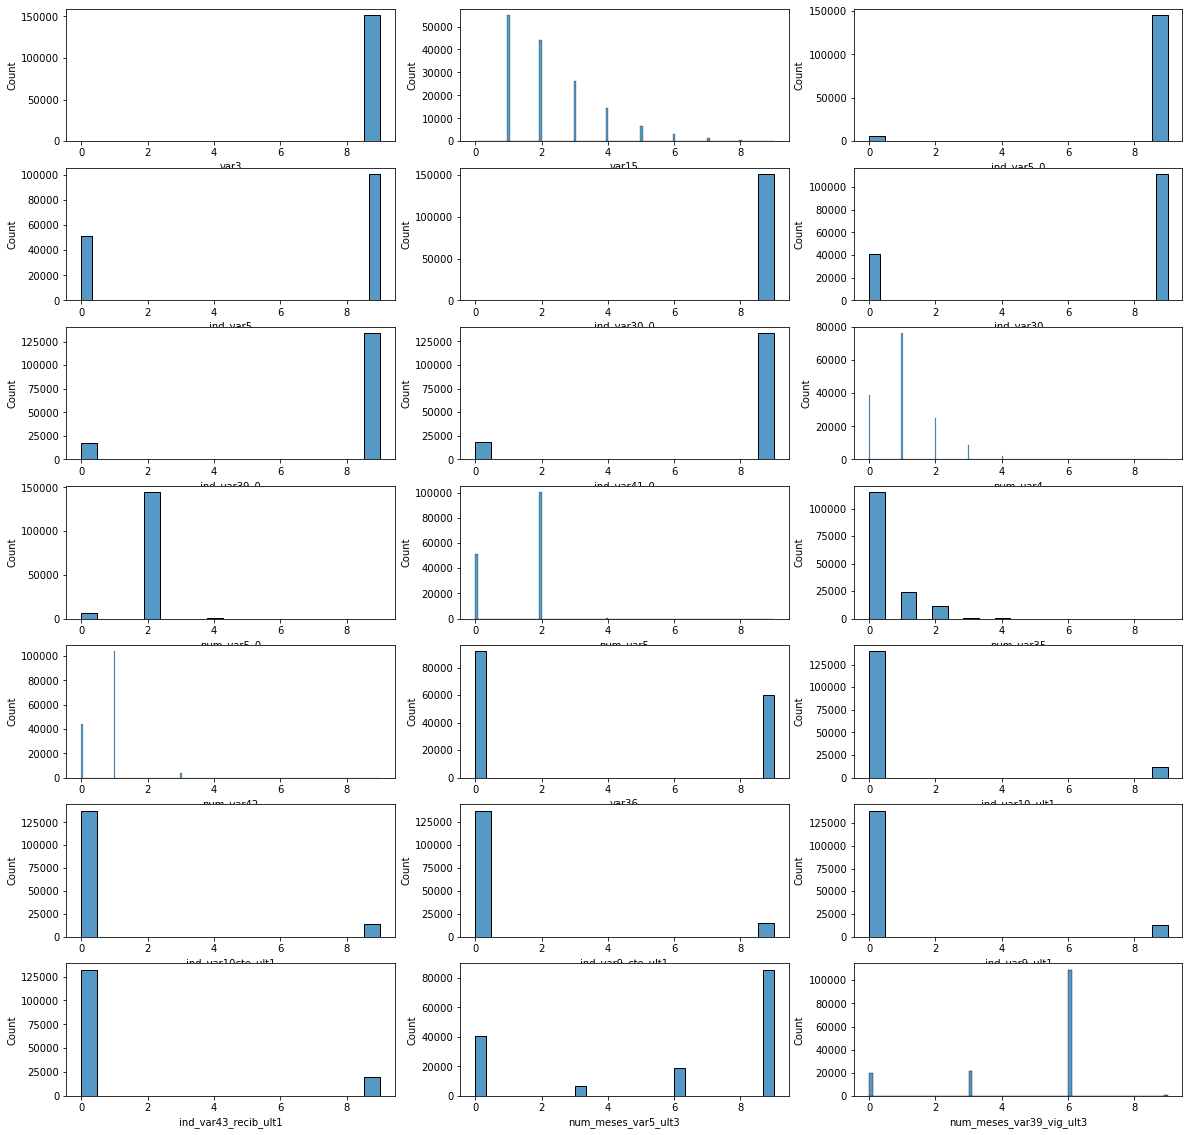

In [14]:
fig=plt.figure(figsize=(20,20))
for i,var in enumerate(df.columns):
  fig.add_subplot(7,3,i+1)
  sns.histplot(data=df[var])
plt.tight_layout

2-4. Feature selection

In [15]:
target_df.value_counts()

TARGET
0.0       73012
1.0        3008
dtype: int64

In [16]:
from sklearn.feature_selection import SelectKBest,chi2
selector=SelectKBest(chi2,k=10)
best10=selector.fit_transform(df.head(76020),target_df['TARGET'].dropna())
name=df.columns[selector.get_support()]
df=pd.DataFrame(best10,columns=name)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   var15                 76020 non-null  float64
 1   ind_var5              76020 non-null  float64
 2   ind_var30             76020 non-null  float64
 3   ind_var39_0           76020 non-null  float64
 4   num_var4              76020 non-null  float64
 5   num_var5              76020 non-null  float64
 6   num_var42             76020 non-null  float64
 7   var36                 76020 non-null  float64
 8   ind_var43_recib_ult1  76020 non-null  float64
 9   num_meses_var5_ult3   76020 non-null  float64
dtypes: float64(10)
memory usage: 5.8 MB


3.Modeling

In [18]:
realdf=pd.concat([df,target_df],axis=1)
santander_df=realdf.loc[realdf.TARGET!=2.0]
test_df=realdf.loc[realdf.TARGET==2.0].drop('TARGET',axis=1,inplace=True)
santander_target=santander_df['TARGET']
santander_feature=santander_df.drop('TARGET',axis=1)

In [19]:
X_train,X_test,y_train,y_test=train_test_split(santander_feature,santander_target,test_size=0.2,random_state=0)
xgb_clf=XGBClassifier(random_state=0,eval_metric='logloss')
lgbm_clf=LGBMClassifier(random_state=0)

In [20]:
params={'learning_rate':[0.02],
        'n_estimators':[200,300,400],
        'max_depth':[3,5,7],
        'colsample_bytree':[0.7,0.8],
        'subsample':[0.9]}
xgb_gridcv=GridSearchCV(xgb_clf,param_grid=params,cv=5)
xgb_gridcv.fit(X_train,y_train)
print('Best parameters are\n',xgb_gridcv.best_params_)        

[21:50:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:50:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:50:42] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:50:43] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[21:51:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:51:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:51:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:51:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[21:52:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:52:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:52:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:52:58] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [21]:
params={'learning_rate':[0.02],
        'n_estimators':[200,300,400],
        'max_depth':[5,7,9],
        'num_leaves':[10,20,30],
        'colsample_bytree':[0.7,0.8],
        'subsample':[0.9]}
lgbm_gridcv=GridSearchCV(lgbm_clf,param_grid=params,cv=5)
lgbm_gridcv.fit(X_train,y_train)
print('Best parameters are\n',lgbm_gridcv.best_params_)        

Best parameters are
 {'colsample_bytree': 0.7, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 200, 'num_leaves': 10, 'subsample': 0.9}


In [22]:
xgb_clf=xgb_gridcv.best_estimator_
lgbm_clf=lgbm_gridcv.best_estimator_
pred1=lgbm_clf.fit(X_train,y_train).predict(X_test)
pred2=xgb_clf.fit(X_train,y_train).predict(X_test)
vo_clf=VotingClassifier([('xgb',xgb_clf),('lgbm',lgbm_clf)],voting='soft',weights=[1,1])
pred=vo_clf.fit(X_train,y_train).predict(X_test)
print('Each score was : {0:4f} / {1:4f}'.format(roc_auc_score(y_test,pred1),roc_auc_score(y_test,pred2)))
print('\nfinal score was : ',roc_auc_score(y_test,pred))  #so...worse than plain guessing

[21:55:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:55:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Each score was : 0.500000 / 0.500000

final score was :  0.5


Uploading

In [24]:
test_df.drop('ID',axis=1,inplace=True)
test_df.head(3)

AttributeError: 'NoneType' object has no attribute 'drop'

In [ ]:
realpred=vo_clf.predict(test_df)
realpred=pd.DataFrame(realpred,columns=['TARGET'])
submit_df=pd.DataFrame({'ID':id,'TARGET':realpred})
submit_df.head(3)

In [ ]:
submit_df.to_csv('C:\\Users\\Dongjun\\.kaggle\\santander\\submit1.csv',index=False)